# <center> Bildaufnahme mit Viola-Jones/HOG </center>

Initialisieren des Basisverzeichnisses und löschen eines alten Bildes, falls verfügbar. Es werden iterativ 10 Fotos der Person gemacht.

In [37]:
import cv2
import os
base_dir = 'c:/photos/'
detect = False
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
if os.path.exists(base_dir + "cropped.jpg"):
    os.remove(base_dir + "cropped.jpg")
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 250)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 250)
# Prüfen, ob die Kamera aktiviert ist
if not cap.isOpened():
    raise IOError("Kamera kann nicht geöffnet werden")
count = 0
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imwrite(base_dir + "frame%d.jpg" % count, frame)  
    c = cv2.waitKey(1)
    if c == 27:
        break
    if (cv2.waitKey(1) == 27) or (count == 10):                     # Schließen wenn ESC gedrückt wird
        break
    count += 1
cap.release()
cv2.destroyAllWindows()

Ein zufälliges Bild wird aus diesen 10 Bilder für die weitere Bearbeitung gewählt.

In [38]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
values = list(range(10))
presentimage = (random.choice(values))
print (presentimage)
img=mpimg.imread(base_dir +"frame%d.jpg" %presentimage)

4


Definition und Verwendung des Viola Jones-Algorithmus, um ein Gesicht aus dem ausgewählten Bild zu erkennen.

In [39]:
import cv2
import os

def facecrop(image):
    facedata = 'haarcascade_frontalface_default.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    minisize = (img.shape[1],img.shape[0])
    miniframe = cv2.resize(img, minisize)

    faces = cascade.detectMultiScale(miniframe)

    for f in faces:
        x, y, w, h = [ v for v in f ]
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,255,255))

        sub_face = img[y:y+h, x:x+w]
        fname, ext = os.path.splitext(image)
        cv2.imwrite(base_dir +"cropped.jpg", sub_face)
    return

facecrop(base_dir +"frame%d.jpg" % presentimage)

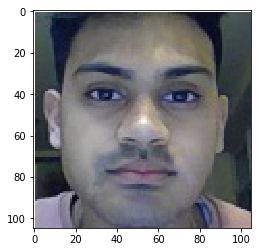

In [40]:
exists = os.path.isfile(base_dir +"cropped.jpg")
if exists:
    img=mpimg.imread(base_dir +"cropped.jpg" )
    imgplot = plt.imshow(img) 
    detect = True
else:
    detect = False
    print("Kein Bild gefunden")

Überprüfen im Basisverzeichnis, ob Viola Jones ein Gesicht erkannt hat, wenn dies nicht der Fall ist, wird mit SVM Hog fortgefahren. Zudem soll ein Fehler gemeldet werden, wenn mehr als ein Gesicht erkannt wird.

In [41]:
import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt

if detect == False:
# Load image
    img_path = base_dir + 'frame%d.jpg' % presentimage
    image = io.imread(img_path)
    face_detector = dlib.get_frontal_face_detector()
# Detect faces
    dets = face_detector(image, 1)
    if (len(dets) != 0):
        for i, d in enumerate(dets):
            if (len(dets) == 1):
                crop_img = image[max(0, d.top()): min(d.bottom(), 250),
                        max(0, d.left()): min(d.right(), 250)]
        
                cv2.imwrite(base_dir + "cropped.jpg", crop_img)
            else:
                print("Kein oder mehr als ein Gesicht erkannt")   
                plt.subplot(1, len(dets), n+1)
                plt.axis('off')
                plt.imshow(crop_img)
    else:
        print("Kein Gesicht erkannt")
else:
    print("Prozess beendet")

Prozess beendet


Das zugeschnittenen Bildes wird auf 250 x 250 umgeändert, um die Erkennung durch VGG16 zu erleichtern.

In [42]:
W = 250.
image = cv2.imread(base_dir + "cropped.jpg")
height, width, depth = image.shape
imgScale = W/width
newX,newY = image.shape[1]*imgScale, image.shape[0]*imgScale
newimg = cv2.resize(image,(int(newX),int(newY)))
image = cv2.imwrite(base_dir + "cropped.jpg",newimg)
#cv2.imshow("Show by CV2",newimg)

Testen, ob das Bild zugeschnitten wurde

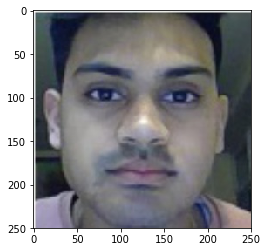

In [43]:
import matplotlib.image as mpimg
img=mpimg.imread(base_dir + "cropped.jpg" )
imgplot = plt.imshow(img) 